In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

In [3]:
yearst = pd.read_csv("05122024_NG_yearST_final.csv", sep="\t")

In [4]:
yearst.head()

,Sample,Final_NG-MAST,POR,TBPB,Genogroup,Final_NG-STAR,penA,mtrR,porB,ponA,...,23S,ST,abcZ,adk,aroE,fumC,gdh,pdhC,pgm,Year
0,NG-1-2017,10451,6106,110.0,10451,90,34.001,1,11,1,...,100,1901,109.0,39,170.0,111.0,148.0,153.0,65.0,2017
1,NG-10-2017,11933,536,16.0,11933,1061,14.002,15,1,100,...,6,1584,59.0,39,67.0,156.0,150.0,153.0,65.0,2017
2,NG-10-2018,3671,2206,3.0,3671,1064,14.001,10,14,100,...,6,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018
3,NG-100-2018,5985,3575,1189.0,5985,42,14.001,10,3,100,...,100,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018
4,NG-101-2018,5985,3575,1189.0,5985,42,14.001,10,3,100,...,100,12462,59.0,39,785.0,157.0,188.0,153.0,65.0,2018


In [49]:
yearst = yearst.set_index("Sample")

In [50]:
yearst = yearst[['Final_NG-MAST',"Genogroup", 'Final_NG-STAR', 'ST', 'Year']]

In [51]:
yearst.to_csv("06162024_yearst_juststyear.csv")

In [52]:
yearst = yearst.astype(str)

In [53]:
YMLST=pd.crosstab(yearst['ST'], yearst['Year'])
YMAST=pd.crosstab(yearst['Final_NG-MAST'], yearst['Year'])
YSTAR=pd.crosstab(yearst['Final_NG-STAR'], yearst['Year'])
YGeno=pd.crosstab(yearst['Genogroup'], yearst['Year'])

In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
YSTAR

Year,2017,2018,2019,2020,2021,2022
Final_NG-STAR,,,,,,
*371b,2,0,0,0,0,0
*8b72,1,0,0,0,0,0
*bb02,2,0,0,0,0,0
*cc2f,1,0,0,0,0,0
1034,0,0,0,1,0,0
1046,2,1,0,0,1,0
1061,16,18,15,8,1,3
1062,2,0,0,0,0,0
1063,1,0,0,0,0,0


In [15]:
column_name = 'Year'
value_to_count = '2017'

# Get the total count for the specified value in the column
count = yearst[column_name].value_counts().get(value_to_count, 0)
count

78

In [16]:
YMLST["2017_P"] = (YMLST["2017"]/78)*100
YMLST["2018_P"] = (YMLST["2018"]) / 114*100
YMLST["2019_P"] = (YMLST["2019"] / 119)*100
YMLST["2020_P"] = (YMLST["2020"] / 47)*100
YMLST["2021_P"] = (YMLST["2021"] / 41)*100
YMLST["2022_P"] = (YMLST["2022"] / 28)*100
YMLST
YMLST.to_csv('06162024_MLST_totals_proportions_peryear.csv')
YMLST

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
ST,,,,,,,,,,,,
10314,0,0,1,1,1,0,0.000000,0.000000,0.840336,2.127660,2.439024,0.000000
10634,0,0,1,1,0,0,0.000000,0.000000,0.840336,2.127660,0.000000,0.000000
10931,0,1,0,0,0,0,0.000000,0.877193,0.000000,0.000000,0.000000,0.000000
11172,3,0,2,1,1,2,3.846154,0.000000,1.680672,2.127660,2.439024,7.142857
11516,0,0,1,0,1,1,0.000000,0.000000,0.840336,0.000000,2.439024,3.571429
11602,5,7,2,0,0,0,6.410256,6.140351,1.680672,0.000000,0.000000,0.000000
11704,0,0,0,3,2,0,0.000000,0.000000,0.000000,6.382979,4.878049,0.000000
11986,0,1,0,0,0,0,0.000000,0.877193,0.000000,0.000000,0.000000,0.000000
12462,7,37,26,8,1,0,8.974359,32.456140,21.848739,17.021277,2.439024,0.000000


In [17]:
filtered_df_YMLST = YMLST[YMLST.apply(lambda x: x >= 5).any(axis=1)]
filtered_df_YMLST

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
ST,,,,,,,,,,,,
11172,3,0,2,1,1,2,3.846154,0.000000,1.680672,2.127660,2.439024,7.142857
11602,5,7,2,0,0,0,6.410256,6.140351,1.680672,0.000000,0.000000,0.000000
11704,0,0,0,3,2,0,0.000000,0.000000,0.000000,6.382979,4.878049,0.000000
12462,7,37,26,8,1,0,8.974359,32.456140,21.848739,17.021277,2.439024,0.000000
14610,0,1,5,3,6,2,0.000000,0.877193,4.201681,6.382979,14.634146,7.142857
1584,35,31,18,9,1,1,44.871795,27.192982,15.126050,19.148936,2.439024,3.571429
16120,0,10,17,3,4,0,0.000000,8.771930,14.285714,6.382979,9.756098,0.000000
16674,0,0,2,3,0,3,0.000000,0.000000,1.680672,6.382979,0.000000,10.714286
1901,21,11,17,6,4,1,26.923077,9.649123,14.285714,12.765957,9.756098,3.571429


In [18]:
# Calculate the sum of counts for each 'ST' over all years
YMLST['Total_Count'] = YMLST.loc[:, '2017':'2022'].sum(axis=1)

# Filter rows based on the condition for the new column
filtered_YMLST = YMLST[YMLST['Total_Count'] >= 5]

filtered_YMLST

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P,Total_Count
ST,,,,,,,,,,,,,
11172,3,0,2,1,1,2,3.846154,0.000000,1.680672,2.127660,2.439024,7.142857,9
11602,5,7,2,0,0,0,6.410256,6.140351,1.680672,0.000000,0.000000,0.000000,14
11704,0,0,0,3,2,0,0.000000,0.000000,0.000000,6.382979,4.878049,0.000000,5
12462,7,37,26,8,1,0,8.974359,32.456140,21.848739,17.021277,2.439024,0.000000,79
14610,0,1,5,3,6,2,0.000000,0.877193,4.201681,6.382979,14.634146,7.142857,17
1584,35,31,18,9,1,1,44.871795,27.192982,15.126050,19.148936,2.439024,3.571429,95
16120,0,10,17,3,4,0,0.000000,8.771930,14.285714,6.382979,9.756098,0.000000,34
16674,0,0,2,3,0,3,0.000000,0.000000,1.680672,6.382979,0.000000,10.714286,8
1901,21,11,17,6,4,1,26.923077,9.649123,14.285714,12.765957,9.756098,3.571429,60


In [24]:
YMLST = YMLST[["2017_P","2018_P", "2019_P", "2020_P", "2021_P", "2022_P"]].reset_index()

In [25]:
YMLST_long_data = pd.melt(YMLST, id_vars=["ST"], var_name='Year', value_name='Proportion')

In [27]:
YMLST_long_data

,ST,Year,Proportion
0,10314,2017_P,0.000000
1,10634,2017_P,0.000000
2,10931,2017_P,0.000000
3,11172,2017_P,3.846154
4,11516,2017_P,0.000000
5,11602,2017_P,6.410256
6,11704,2017_P,0.000000
7,11986,2017_P,0.000000
8,12462,2017_P,8.974359
9,12462/*08f6,2017_P,0.000000


                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7.067
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0565
Time:                        14:01:29   Log-Likelihood:                -14.915
No. Observations:                   6   AIC:                             33.83
Df Residuals:                       4   BIC:                             33.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4562.3640   1718.263     -2.655      0.0

/tmp/ipykernel_993965/3397943342.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/3397943342.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_norm

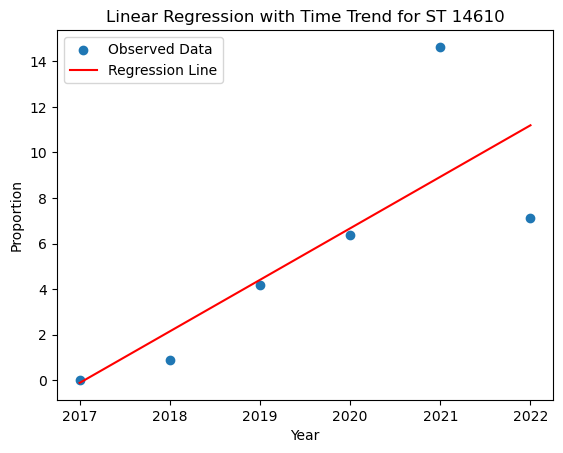

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

YMLST_long_data['Year'] = YMLST_long_data['Year'].str.replace('_P', '')

# Specify the specific ST you're interested in
specific_st = '14610'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     14.30
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0194
Time:                        14:02:57   Log-Likelihood:                -21.944
No. Observations:                   6   AIC:                             47.89
Df Residuals:                       4   BIC:                             47.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.095e+04   5544.591     -3.779      0.0

/tmp/ipykernel_993965/2852555770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2852555770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

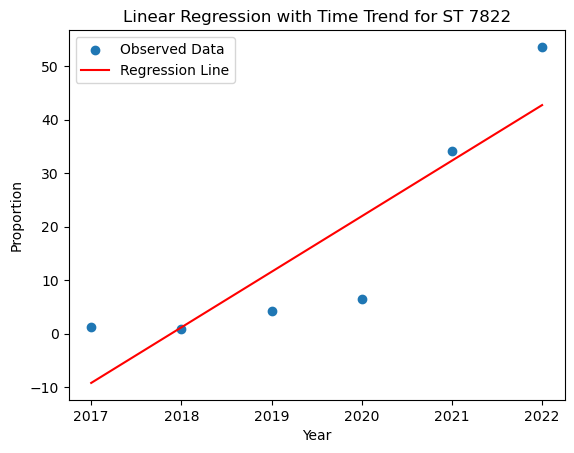

In [31]:
# Specify the specific ST you're interested in
specific_st = '7822'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     3.799
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.123
Time:                        14:03:32   Log-Likelihood:                -14.939
No. Observations:                   6   AIC:                             33.88
Df Residuals:                       4   BIC:                             33.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3359.2649   1725.170     -1.947      0.1

/tmp/ipykernel_993965/2924560779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2924560779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

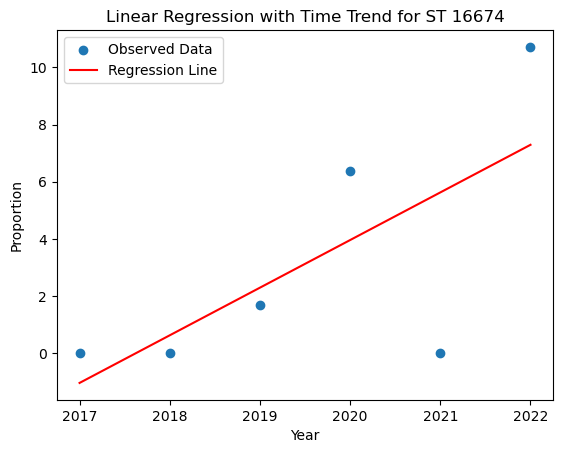

In [32]:
# Specify the specific ST you're interested in
specific_st = '16674'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     25.85
Date:                Sun, 16 Jun 2024   Prob (F-statistic):            0.00706
Time:                        14:04:31   Log-Likelihood:                -18.533
No. Observations:                   6   AIC:                             41.07
Df Residuals:                       4   BIC:                             40.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.599e+04   3140.485      5.091      0.0

/tmp/ipykernel_993965/1479204171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/1479204171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

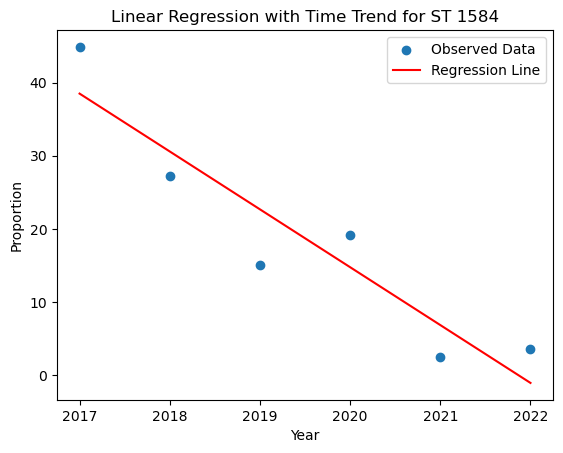

In [33]:
# Specify the specific ST you're interested in
specific_st = '1584'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     7.413
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0528
Time:                        14:05:03   Log-Likelihood:                -17.164
No. Observations:                   6   AIC:                             38.33
Df Residuals:                       4   BIC:                             37.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6818.9484   2499.806      2.728      0.0

/tmp/ipykernel_993965/1541861174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/1541861174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

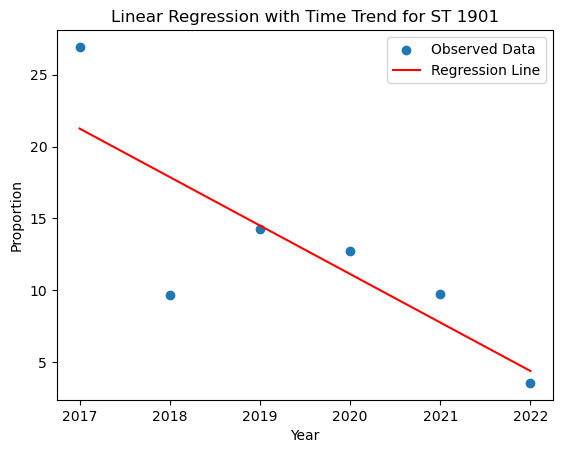

In [34]:
# Specify the specific ST you're interested in
specific_st = '1901'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.292
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.205
Time:                        14:05:37   Log-Likelihood:                -21.703
No. Observations:                   6   AIC:                             47.41
Df Residuals:                       4   BIC:                             46.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8077.3999   5326.743      1.516      0.2

/tmp/ipykernel_993965/2254420963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2254420963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

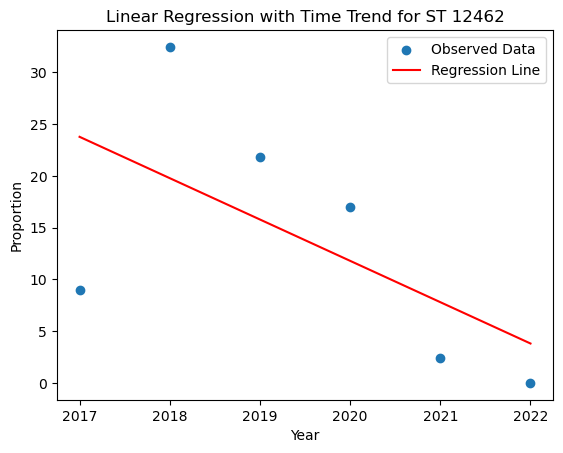

In [35]:
# Specify the specific ST you're interested in
specific_st = '12462'

# Filter data for the specific ST
specific_data = YMLST_long_data[YMLST_long_data['ST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

In [56]:
YMAST["2017_P"] = (YMAST["2017"]/78)*100
YMAST["2018_P"] = (YMAST["2018"]) / 114*100
YMAST["2019_P"] = (YMAST["2019"] / 119)*100
YMAST["2020_P"] = (YMAST["2020"] / 47)*100
YMAST["2021_P"] = (YMAST["2021"] / 41)*100
YMAST["2022_P"] = (YMAST["2022"] / 28)*100
YMAST

YMAST.to_csv('11262023_NGMAST_totals_proportions_peryear.csv')
filtered_df_YMAST = YMAST[YMAST.apply(lambda x: x >= 5).any(axis=1)]
filtered_df_YMAST

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
Final_NG-MAST,,,,,,,,,,,,
10451,20,9,11,3,2,1,25.641026,7.894737,9.243697,6.382979,4.878049,3.571429
11933,13,18,15,8,0,0,16.666667,15.789474,12.605042,17.021277,0.000000,0.000000
12824,0,1,1,1,4,0,0.000000,0.877193,0.840336,2.127660,9.756098,0.000000
14994,0,0,3,0,0,4,0.000000,0.000000,2.521008,0.000000,0.000000,14.285714
19760,0,0,0,2,9,6,0.000000,0.000000,0.000000,4.255319,21.951220,21.428571
19814,0,0,0,0,3,1,0.000000,0.000000,0.000000,0.000000,7.317073,3.571429
19817,0,0,0,3,2,0,0.000000,0.000000,0.000000,6.382979,4.878049,0.000000
20670,0,0,0,0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857
20671,0,0,0,0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857


In [57]:
# Calculate the sum of counts for each 'ST' over all years
YMAST['Total_Count'] = YMAST.loc[:, '2017':'2022'].sum(axis=1)

# Filter rows based on the condition for the new column
filtered_YMAST = YMAST[YMAST['Total_Count'] >= 5]

filtered_YMAST

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P,Total_Count
Final_NG-MAST,,,,,,,,,,,,,
10451,20,9,11,3,2,1,25.641026,7.894737,9.243697,6.382979,4.878049,3.571429,46
11299,3,3,0,0,0,0,3.846154,2.631579,0.000000,0.000000,0.000000,0.000000,6
11933,13,18,15,8,0,0,16.666667,15.789474,12.605042,17.021277,0.000000,0.000000,54
12824,0,1,1,1,4,0,0.000000,0.877193,0.840336,2.127660,9.756098,0.000000,7
14994,0,0,3,0,0,4,0.000000,0.000000,2.521008,0.000000,0.000000,14.285714,7
19760,0,0,0,2,9,6,0.000000,0.000000,0.000000,4.255319,21.951220,21.428571,17
19817,0,0,0,3,2,0,0.000000,0.000000,0.000000,6.382979,4.878049,0.000000,5
20821,0,0,7,0,0,0,0.000000,0.000000,5.882353,0.000000,0.000000,0.000000,7
3671,1,4,0,0,1,0,1.282051,3.508772,0.000000,0.000000,2.439024,0.000000,6


In [58]:
YMAST = YMAST[["2017_P","2018_P", "2019_P", "2020_P", "2021_P", "2022_P"]].reset_index()

In [59]:
YMAST

Year,Final_NG-MAST,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
0,-,0.000000,0.000000,0.840336,0.000000,0.000000,0.000000
1,10451,25.641026,7.894737,9.243697,6.382979,4.878049,3.571429
2,10620,0.000000,0.000000,0.840336,2.127660,0.000000,0.000000
3,10828,0.000000,0.877193,0.000000,0.000000,0.000000,0.000000
4,11299,3.846154,2.631579,0.000000,0.000000,0.000000,0.000000
5,11461,0.000000,0.000000,0.840336,2.127660,2.439024,0.000000
6,11477,0.000000,0.000000,0.000000,0.000000,2.439024,3.571429
7,11765,0.000000,0.000000,0.000000,2.127660,0.000000,0.000000
8,11933,16.666667,15.789474,12.605042,17.021277,0.000000,0.000000
9,12302,0.000000,0.000000,0.840336,0.000000,0.000000,0.000000


In [60]:
YMAST

Year,Final_NG-MAST,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
0,-,0.000000,0.000000,0.840336,0.000000,0.000000,0.000000
1,10451,25.641026,7.894737,9.243697,6.382979,4.878049,3.571429
2,10620,0.000000,0.000000,0.840336,2.127660,0.000000,0.000000
3,10828,0.000000,0.877193,0.000000,0.000000,0.000000,0.000000
4,11299,3.846154,2.631579,0.000000,0.000000,0.000000,0.000000
5,11461,0.000000,0.000000,0.840336,2.127660,2.439024,0.000000
6,11477,0.000000,0.000000,0.000000,0.000000,2.439024,3.571429
7,11765,0.000000,0.000000,0.000000,2.127660,0.000000,0.000000
8,11933,16.666667,15.789474,12.605042,17.021277,0.000000,0.000000
9,12302,0.000000,0.000000,0.840336,0.000000,0.000000,0.000000


In [61]:
YMAST_long_data = pd.melt(YMAST, id_vars=["Final_NG-MAST"], var_name='Year', value_name='Proportion')

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7.375
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0532
Time:                        14:15:14   Log-Likelihood:                -17.394
No. Observations:                   6   AIC:                             38.79
Df Residuals:                       4   BIC:                             38.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7063.9329   2597.547      2.719      0.0

/tmp/ipykernel_993965/2344775623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2344775623.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_norm

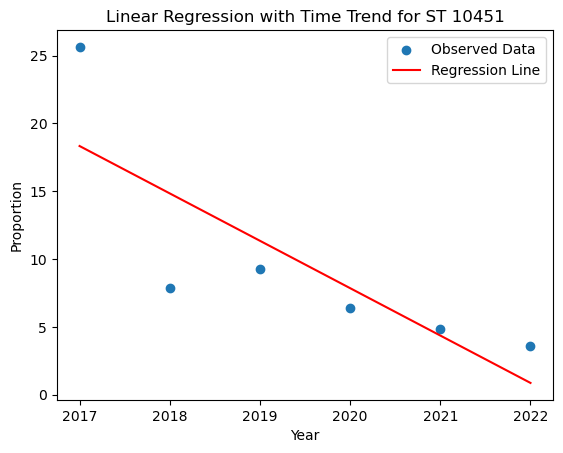

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

YMAST_long_data['Year'] = YMAST_long_data['Year'].str.replace('_P', '')

# Specify the specific ST you're interested in
specific_st = '10451'

# Filter data for the specific ST
specific_data = YMAST_long_data[YMAST_long_data['Final_NG-MAST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     8.638
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0424
Time:                        14:15:50   Log-Likelihood:                -17.114
No. Observations:                   6   AIC:                             38.23
Df Residuals:                       4   BIC:                             37.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7297.0216   2479.199      2.943      0.0

/tmp/ipykernel_993965/456138252.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/456138252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest

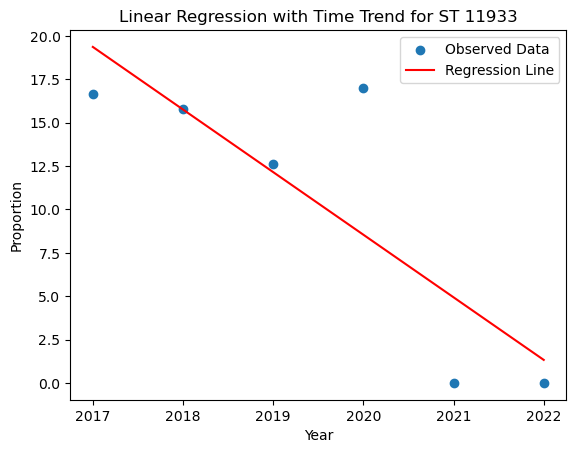

In [64]:
# Specify the specific ST you're interested in
specific_st = '11933'

# Filter data for the specific ST
specific_data = YMAST_long_data[YMAST_long_data['Final_NG-MAST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.463
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.293
Time:                        14:16:22   Log-Likelihood:                -23.337
No. Observations:                   6   AIC:                             50.67
Df Residuals:                       4   BIC:                             50.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8474.1570   6993.483      1.212      0.2

/tmp/ipykernel_993965/971081799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/971081799.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest

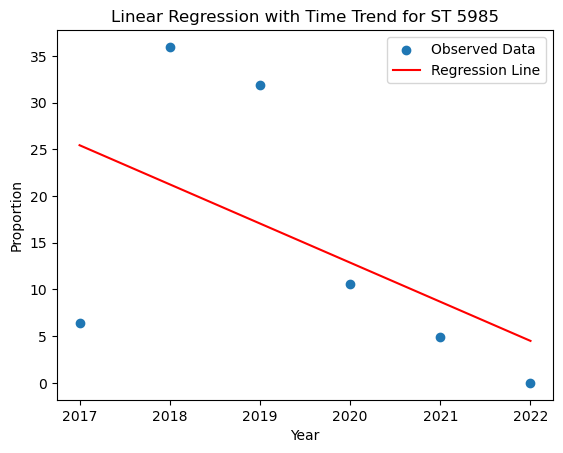

In [65]:
# Specify the specific ST you're interested in
specific_st = '5985'

# Filter data for the specific ST
specific_data = YMAST_long_data[YMAST_long_data['Final_NG-MAST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0211
Time:                        14:18:10   Log-Likelihood:                -17.790
No. Observations:                   6   AIC:                             39.58
Df Residuals:                       4   BIC:                             39.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.022e+04   2774.590     -3.683      0.0

/tmp/ipykernel_993965/1004868746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/1004868746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

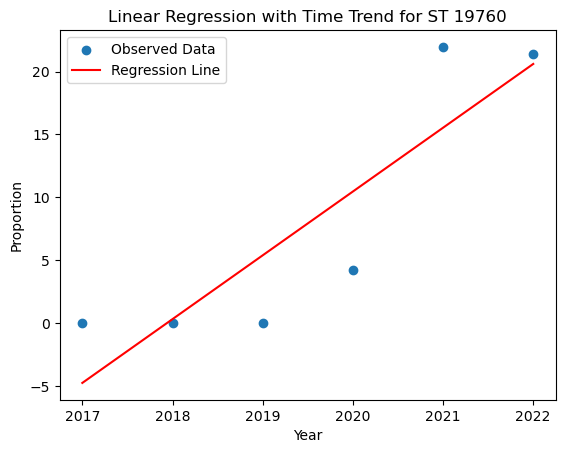

In [66]:
# Specify the specific ST you're interested in
specific_st = '19760'

# Filter data for the specific ST
specific_data = YMAST_long_data[YMAST_long_data['Final_NG-MAST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2.840
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.167
Time:                        14:18:42   Log-Likelihood:                -16.817
No. Observations:                   6   AIC:                             37.63
Df Residuals:                       4   BIC:                             37.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3973.1653   2359.167     -1.684      0.1

/tmp/ipykernel_993965/2224535516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2224535516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

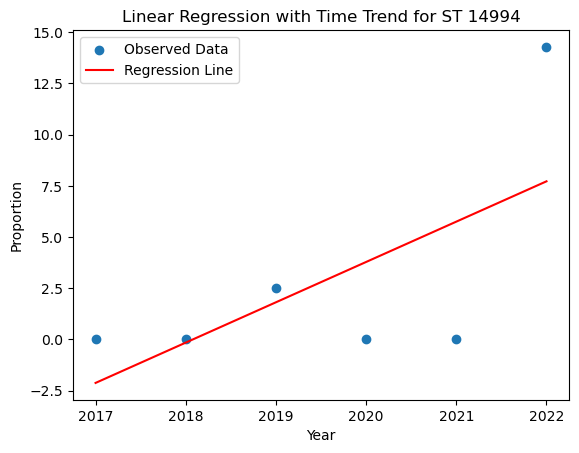

In [67]:
# Specify the specific ST you're interested in
specific_st = '14994'

# Filter data for the specific ST
specific_data = YMAST_long_data[YMAST_long_data['Final_NG-MAST'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

In [69]:
YSTAR["2017_P"] = (YSTAR["2017"]/78)*100
YSTAR["2018_P"] = (YSTAR["2018"]) / 114*100
YSTAR["2019_P"] = (YSTAR["2019"] / 119)*100
YSTAR["2020_P"] = (YSTAR["2020"] / 47)*100
YSTAR["2021_P"] = (YSTAR["2021"] / 41)*100
YSTAR["2022_P"] = (YSTAR["2022"] / 28)*100
YSTAR
YSTAR.to_csv('11262023_NGSTAR_totals_proportions_peryear.csv')
filtered_df_YSTAR = YSTAR[YSTAR.apply(lambda x: x >= 5).any(axis=1)]
filtered_df_YSTAR

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P
Final_NG-STAR,,,,,,,,,,,,
1061,16,18,15,8,1,3,20.512821,15.789474,12.605042,17.021277,2.439024,10.714286
1493,0,0,5,3,13,13,0.000000,0.000000,4.201681,6.382979,31.707317,46.428571
160,15,6,3,2,0,0,19.230769,5.263158,2.521008,4.255319,0.000000,0.000000
2148,0,0,1,1,2,2,0.000000,0.000000,0.840336,2.127660,4.878049,7.142857
2885,0,0,7,0,0,0,0.000000,0.000000,5.882353,0.000000,0.000000,0.000000
2889,0,0,3,5,1,0,0.000000,0.000000,2.521008,10.638298,2.439024,0.000000
42,6,37,24,8,1,0,7.692308,32.456140,20.168067,17.021277,2.439024,0.000000
43,0,6,16,1,1,0,0.000000,5.263158,13.445378,2.127660,2.439024,0.000000
442,0,2,6,1,2,1,0.000000,1.754386,5.042017,2.127660,4.878049,3.571429


In [70]:
# Calculate the sum of counts for each 'ST' over all years
YSTAR['Total_Count'] = YSTAR.loc[:, '2017':'2022'].sum(axis=1)

# Filter rows based on the condition for the new column
filtered_YSTAR = YSTAR[YSTAR['Total_Count'] >= 5]

filtered_YSTAR

Year,2017,2018,2019,2020,2021,2022,2017_P,2018_P,2019_P,2020_P,2021_P,2022_P,Total_Count
Final_NG-STAR,,,,,,,,,,,,,
1061,16,18,15,8,1,3,20.512821,15.789474,12.605042,17.021277,2.439024,10.714286,61
1493,0,0,5,3,13,13,0.000000,0.000000,4.201681,6.382979,31.707317,46.428571,34
160,15,6,3,2,0,0,19.230769,5.263158,2.521008,4.255319,0.000000,0.000000,26
2148,0,0,1,1,2,2,0.000000,0.000000,0.840336,2.127660,4.878049,7.142857,6
2885,0,0,7,0,0,0,0.000000,0.000000,5.882353,0.000000,0.000000,0.000000,7
2889,0,0,3,5,1,0,0.000000,0.000000,2.521008,10.638298,2.439024,0.000000,9
42,6,37,24,8,1,0,7.692308,32.456140,20.168067,17.021277,2.439024,0.000000,76
43,0,6,16,1,1,0,0.000000,5.263158,13.445378,2.127660,2.439024,0.000000,24
442,0,2,6,1,2,1,0.000000,1.754386,5.042017,2.127660,4.878049,3.571429,12


In [71]:
YSTAR = YSTAR[["2017_P","2018_P", "2019_P", "2020_P", "2021_P", "2022_P"]].reset_index()

In [72]:
YSTAR_long_data = pd.melt(YSTAR, id_vars=["Final_NG-STAR"], var_name='Year', value_name='Proportion')

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.317
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.106
Time:                        14:22:23   Log-Likelihood:                -16.794
No. Observations:                   6   AIC:                             37.59
Df Residuals:                       4   BIC:                             37.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4896.2036   2350.189      2.083      0.1

/tmp/ipykernel_993965/928795288.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/928795288.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

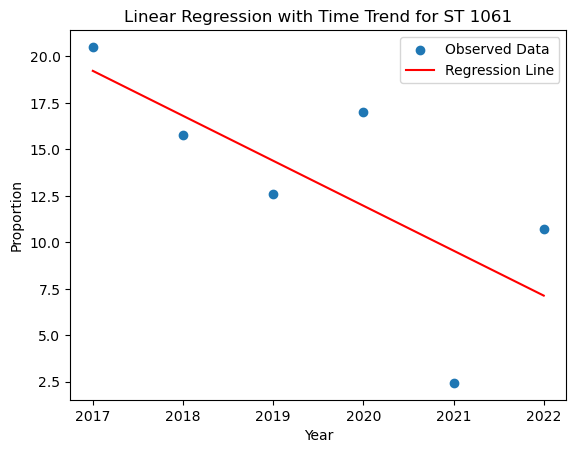

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

YSTAR_long_data['Year'] = YSTAR_long_data['Year'].str.replace('_P', '')

# Specify the specific ST you're interested in
specific_st = '1061'

# Filter data for the specific ST
specific_data = YSTAR_long_data[YSTAR_long_data['Final_NG-STAR'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     8.118
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0464
Time:                        14:23:01   Log-Likelihood:                -16.484
No. Observations:                   6   AIC:                             36.97
Df Residuals:                       4   BIC:                             36.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6364.2715   2231.922      2.851      0.0

/tmp/ipykernel_993965/3334896509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/3334896509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

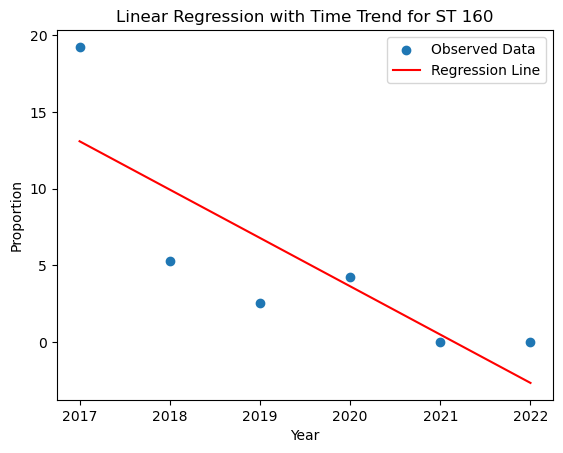

In [74]:
# Specify the specific ST you're interested in
specific_st = '160'

# Filter data for the specific ST
specific_data = YSTAR_long_data[YSTAR_long_data['Final_NG-STAR'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0141
Time:                        14:23:26   Log-Likelihood:                -16.072
No. Observations:                   6   AIC:                             36.14
Df Residuals:                       4   BIC:                             35.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8690.8772   2083.977      4.170      0.0

/tmp/ipykernel_993965/1818027914.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/1818027914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

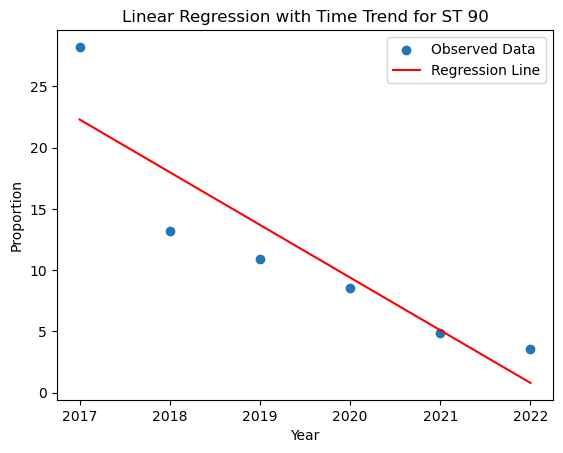

In [75]:
# Specify the specific ST you're interested in
specific_st = '90'

# Filter data for the specific ST
specific_data = YSTAR_long_data[YSTAR_long_data['Final_NG-STAR'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.37
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0141
Time:                        14:24:01   Log-Likelihood:                -20.771
No. Observations:                   6   AIC:                             45.54
Df Residuals:                       4   BIC:                             45.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.899e+04   4560.529     -4.165      0.0

/tmp/ipykernel_993965/2257171112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/2257171112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

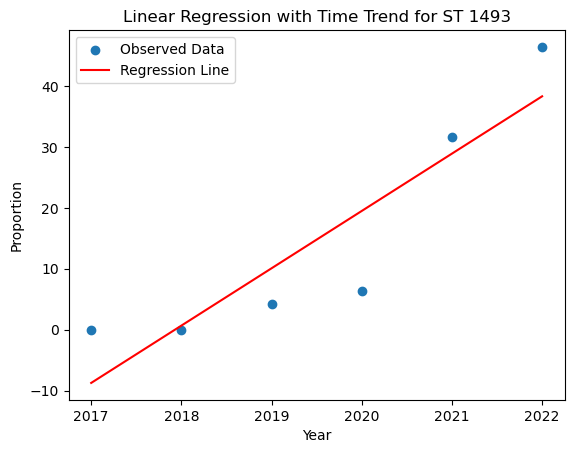

In [76]:
# Specify the specific ST you're interested in
specific_st = '1493'

# Filter data for the specific ST
specific_data = YSTAR_long_data[YSTAR_long_data['Final_NG-STAR'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     4.761
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0945
Time:                        14:24:30   Log-Likelihood:                -15.555
No. Observations:                   6   AIC:                             35.11
Df Residuals:                       4   BIC:                             34.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4168.4669   1911.914     -2.180      0.0

/tmp/ipykernel_993965/1349193750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/1349193750.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

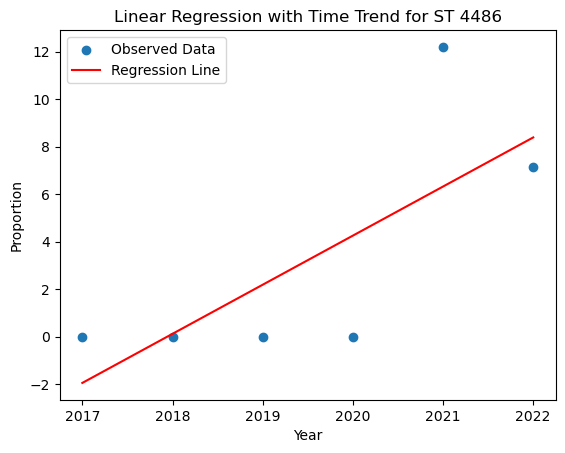

In [77]:
# Specify the specific ST you're interested in
specific_st = '4486'

# Filter data for the specific ST
specific_data = YSTAR_long_data[YSTAR_long_data['Final_NG-STAR'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

In [85]:
amr=pd.read_csv("06162024_NG_Pheno_AMR_Percent_year.csv", sep="\t")

In [86]:
amr

,Antibiotic,2017,2018,2019,2020,2021,2022
0,Azithromycin,1.28,0.88,2.52,0.00,7.32,3.57
1,Cefixime,0.00,0.00,0.00,0.00,0.00,0.00
2,Ceftriaxone,0.00,0.00,0.00,0.00,0.00,0.00
3,Ciprofloxacin,33.33,19.29,26.05,27.66,48.78,64.29
4,Ertapenem,0.00,0.00,0.00,0.00,0.00,0.00
5,Erythromycin,0.00,13.16,15.97,17.02,21.95,38.10
6,Gentamicin,0.00,0.00,0.00,0.00,0.00,0.00
7,Penicillin,11.53,9.65,1.68,4.26,2.44,9.52
8,Spectinomycin,0.00,0.00,0.00,0.00,0.00,0.00
9,Tetracycline,58.97,71.05,62.18,55.32,53.66,57.14


                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     29.13
Date:                Sun, 16 Jun 2024   Prob (F-statistic):            0.00570
Time:                        14:37:37   Log-Likelihood:                -16.741
No. Observations:                   6   AIC:                             37.48
Df Residuals:                       4   BIC:                             37.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.256e+04   2329.794     -5.389      0.0

/tmp/ipykernel_993965/3680106416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/3680106416.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_norm

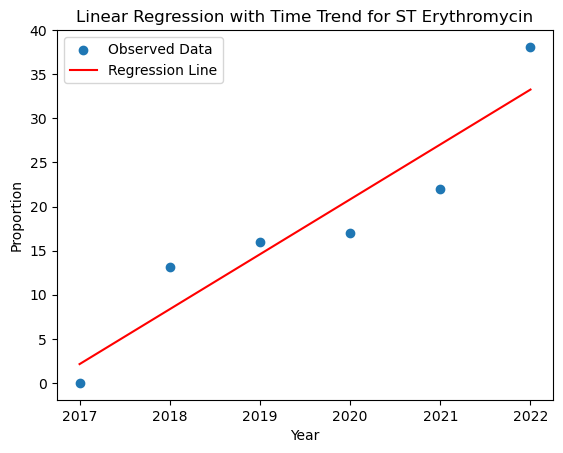

In [89]:
# Convert to long format
amr_long_data = pd.melt(amr, id_vars=['Antibiotic'], var_name='Year', value_name='Proportion')

# Specify the specific ST you're interested in (assuming Antibiotic column is ST)
specific_st = 'Erythromycin'  # For example, replace with your actual ST identifier

# Filter data for the specific ST
specific_data = amr_long_data[amr_long_data['Antibiotic'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     6.119
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0687
Time:                        14:38:12   Log-Likelihood:                -22.122
No. Observations:                   6   AIC:                             48.24
Df Residuals:                       4   BIC:                             47.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.409e+04   5711.892     -2.467      0.0

/tmp/ipykernel_993965/3486992908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Year'] = specific_data['Year'].astype(int)
/tmp/ipykernel_993965/3486992908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_data['Proportion'] = specific_data['Proportion'].astype(float)
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normte

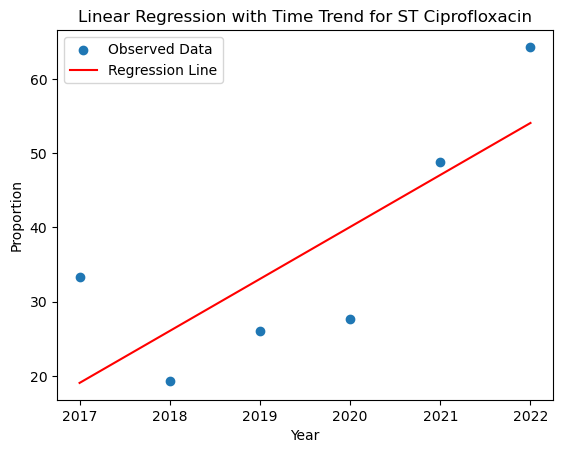

In [90]:
# Specify the specific ST you're interested in (assuming Antibiotic column is ST)
specific_st = 'Ciprofloxacin'  # For example, replace with your actual ST identifier

# Filter data for the specific ST
specific_data = amr_long_data[amr_long_data['Antibiotic'] == specific_st]

# Make sure columns are of correct data types
specific_data['Year'] = specific_data['Year'].astype(int)
specific_data['Proportion'] = specific_data['Proportion'].astype(float)

# Create a linear regression model with time trend
X = specific_data['Year']
X = sm.add_constant(X)  # Add the constant term 'const'
y = specific_data['Proportion']
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the observed data and the regression line
plt.scatter(specific_data['Year'], specific_data['Proportion'], label='Observed Data')
plt.plot(specific_data['Year'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title(f'Linear Regression with Time Trend for ST {specific_st}')
plt.legend()
plt.show()